In [91]:
# Data Science
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("train.csv")

In [3]:
def clean(data):
    data = data.drop(["Sex", "Embarked",
                      "Ticket", "Cabin",
                      "Name", "PassengerId",
                      "SibSp", "Parch"], axis = 1)
    return data.dropna().reset_index(drop=True)
data = clean(data)

In [4]:
data

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500
...,...,...,...,...
709,0,3,39.0,29.1250
710,0,2,27.0,13.0000
711,1,1,19.0,30.0000
712,1,1,26.0,30.0000


In [6]:
for col in ['Fare', 'Age']:
    print(col)
    # 7. Аналіз скошеності та гостроверхості розподілу
    skew_coeff = stats.skew(data[col], bias=False)

    print(skew_coeff)
    if skew_coeff < 0:
        print("Коефіцієнт асиметрії менше за нуль, ",
              "тобто даний розподіл скошений праворуч")
    elif skew_coeff > 0:
        print("Коефіцієнт асиметрії більше за нуль, ",
              "тобто даний розподіл скошений ліворуч")
    else:
        print("Коефіцієнт асиметрії дорівнює нулю, ",
              "тобто даний розподіл симетричний ",
              "відносно матсподівання")

    kurtosis_coeff = stats.kurtosis(data[col], bias=False)

    print(kurtosis_coeff)
    if kurtosis_coeff < 0:
        print("Коефіцієнт ексцесу менше за нуль, "
        "тобто даний розподіл менш гостроверхий, "
        "ніж нормальний з відповідними параметрами")
    elif kurtosis_coeff > 0:
        print("Коефіцієнт ексцесу більше за нуль, "
        "тобто даний розподіл більш гостроверхий, "
        "ніж нормальний з відповідними параметрами")
    else:
        print("Коефіцієнт ексцесу дорівнює нулю, "
        "тобто даний розподіл нормальний")

    # 8. З'ясувати, чи нормально розподілена змінна
    p = 0.05
    # Shapiro-Wilk test
    p_value = stats.shapiro(data[col])[1]
    if p_value > p:
        print("Змінна нормально розподілена")
    else:
        print("Змінна не розподілена нормально")
    print(p_value)

4.653630367827739
Коефіцієнт асиметрії більше за нуль,  тобто даний розподіл скошений ліворуч
30.924249014716096
Коефіцієнт ексцесу більше за нуль, тобто даний розподіл більш гостроверхий, ніж нормальний з відповідними параметрами
Змінна не розподілена нормально
7.461928335514294e-40
0.3891077823008268
Коефіцієнт асиметрії більше за нуль,  тобто даний розподіл скошений ліворуч
0.17827415364210308
Коефіцієнт ексцесу більше за нуль, тобто даний розподіл більш гостроверхий, ніж нормальний з відповідними параметрами
Змінна не розподілена нормально
7.341357388668257e-08


In [36]:
corr_matrix = data.corr(method='spearman')

,Survived,Pclass,Age,Fare
Survived,1.000000,-0.360656,-0.052565,0.339027
Pclass,-0.360656,1.000000,-0.361666,-0.730578
Age,-0.052565,-0.361666,1.000000,0.135051
Fare,0.339027,-0.730578,0.135051,1.000000


In [53]:
corr_matrix = data.corr(method='kendall')
corr_matrix.

,Survived,Pclass,Age,Fare
Survived,1.000000,-0.342105,-0.043385,0.278785
Pclass,-0.342105,1.000000,-0.286081,-0.611963
Age,-0.043385,-0.286081,1.000000,0.093249
Fare,0.278785,-0.611963,0.093249,1.000000


In [50]:
stats.spearmanr(data['Survived'], data['Age']).pvalue

0.16058855181140086

In [49]:
stats.kendalltau(data['Survived'], data['Age']).pvalue

0.1604374625220748

In [106]:
# extract predictor variables (Age, Fare, Pclass) and response variable (Survived)
X = data[['Age', 'Fare', 'Survived']]
y = data['Pclass']

# create a linear regression model
model = sm.OLS(y, X)

# fit the model and extract the coefficient of multiple correlation
r = np.sqrt(model.fit().rsquared)

# print the result
print("Coefficient of multiple correlation:", r)

Coefficient of multiple correlation: 0.7964297781062655


In [107]:
model.fit().pvalues.max()

2.243749651776368e-06

<Axes: xlabel='Fare', ylabel='Age'>

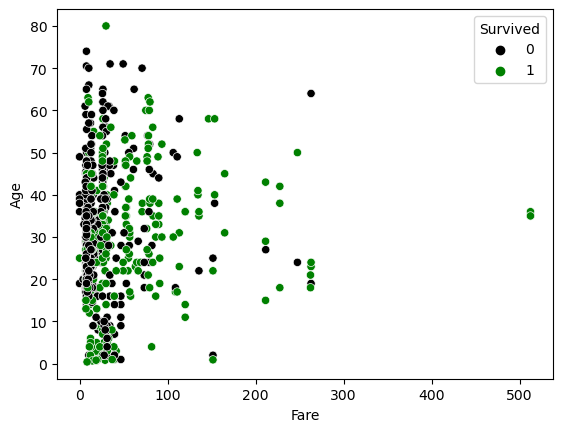

In [128]:
sns.scatterplot(data=data, x='Fare', y='Age', hue='Survived', palette=['black', 'green'], )